In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
sns.set(style='ticks', palette='Set2')
sns.despine()
sns.set_context("talk")
plt.rcParams["font.family"] = "serif"

<Figure size 432x288 with 0 Axes>

In [2]:
columns = ["Name","alpha","delta","e_eps","model","pick_neighbor","test/acc","dataset"]

In [3]:
df_common_cora = pd.read_csv('results/k_rr_cora_v3.csv')
# df_common = pd.read_csv('results/common.csv')

In [4]:
df_common_cora.head()

,Name,alpha,delta,e_eps,model,pick_neighbor,test/acc,dataset
0,3cdba947-faf2-11ed-9aa9-54b20380cf4d,0.0,0.00,inf,sage,k_rr,81.772526,cora
1,5d002bcc-fb0e-11ed-9aa9-54b20380cf4d,0.0,0.00,inf,gat,k_rr,79.689808,cora
2,e31d257c-fad9-11ed-9aa9-54b20380cf4d,0.0,0.00,inf,gcn,k_rr,81.713442,cora
3,ae544f5e-faed-11ed-9aa9-54b20380cf4d,0.0,0.25,inf,gat,k_rr,80.000000,cora
4,db6f2063-faf7-11ed-9aa9-54b20380cf4d,0.0,0.25,inf,sage,k_rr,81.772526,cora


In [6]:
df_common = df_common_cora[df_common_cora['delta'].isin([0.0, 0.25, 0.5, 0.75, 1.0])]

In [8]:
df_common['delta'].unique(), df_common_cora['delta'].unique()

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([0.  , 0.25, 0.5 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))

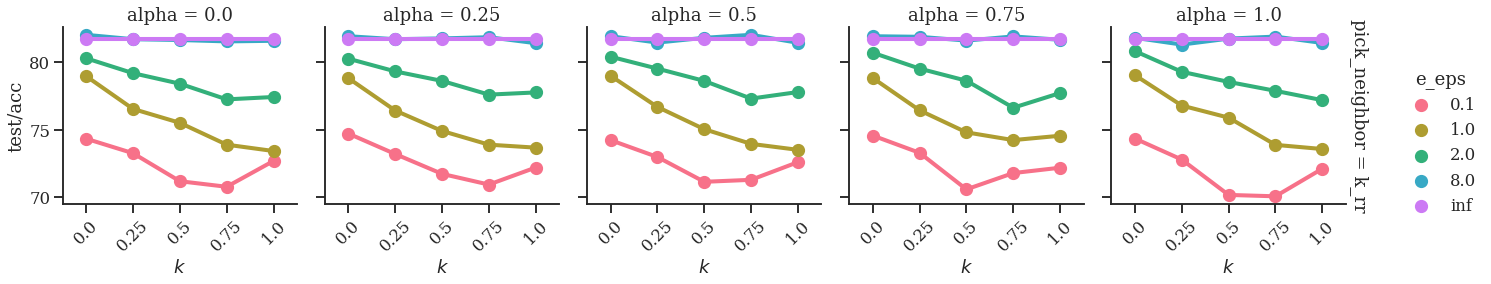

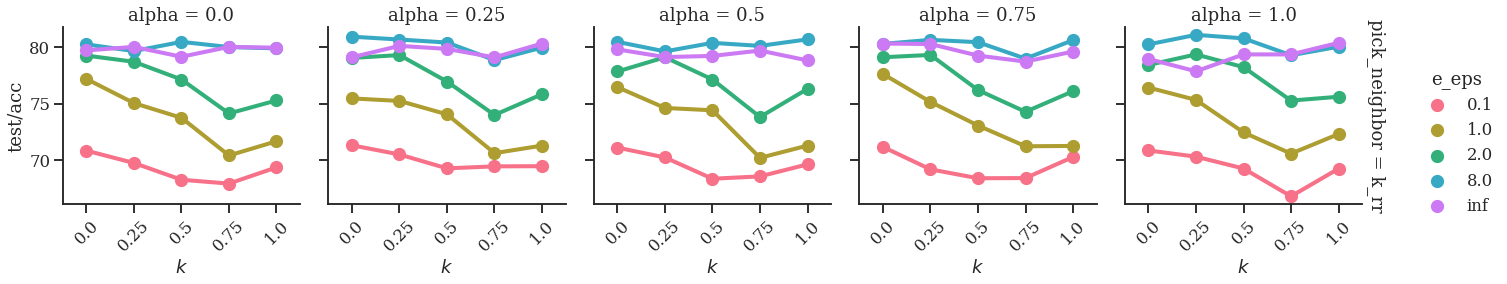

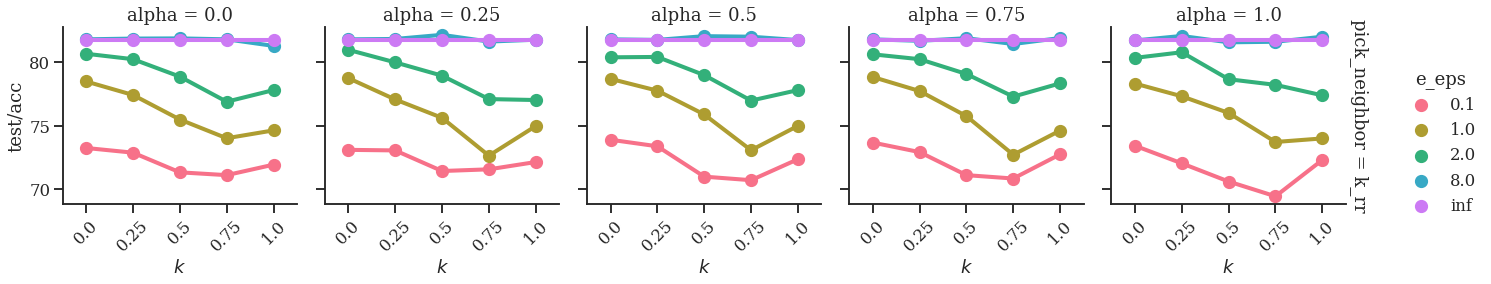

In [9]:
# Uncomment to generate results for fixed model and dataset

datasets = ['cora', 'pubmed', 'lastfm', 'facebook']
datasets = ['cora']
models = ['gcn', 'gat', 'sage']
e_eps=[0.1, 1, 2, 8, np.inf]
alpha=[0, 0.25, 0.5, 0.75, 1]

for model in models:

    for dataset in datasets:
        df_fixed_model_dataset = df_common[(df_common['dataset']==dataset) & (df_common['model']==model)]

        g = sns.catplot(kind='point', data=df_fixed_model_dataset, x='delta', y='test/acc', col='alpha', row='pick_neighbor', hue='e_eps', ci=None, sharex=True, sharey=True, palette="husl", height=4, aspect=1, margin_titles=True)
        
        g.set_xlabels('$k$')
        g.set_xticklabels(rotation=45)

        g.savefig('./images/fix_model_dataset_top_rr/'+str(model)+'_'+str(dataset)+'_top_rr.pdf', dpi=400)

In [13]:
df_common = pd.read_csv('results/common.csv')

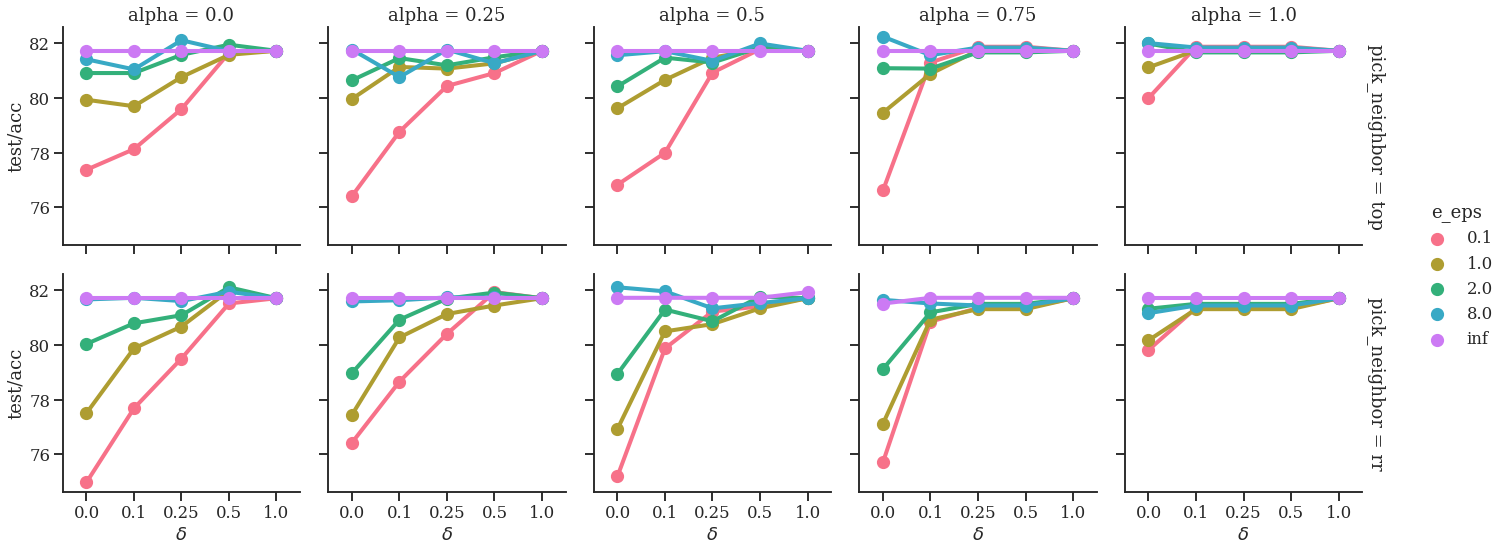

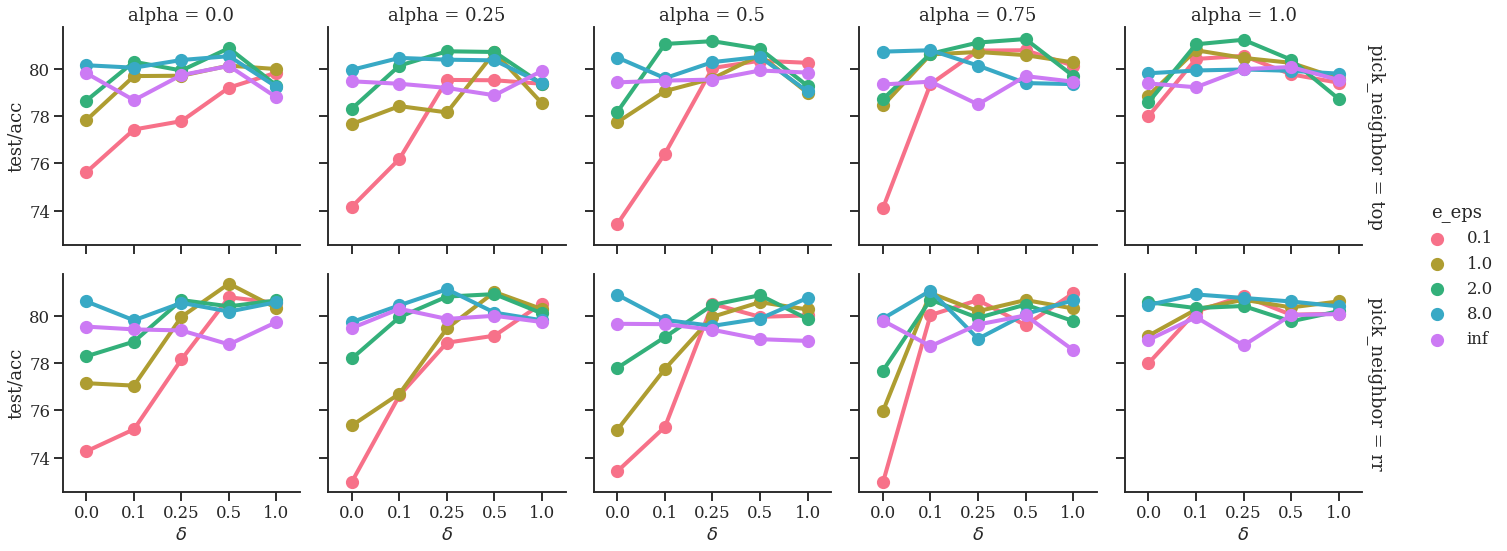

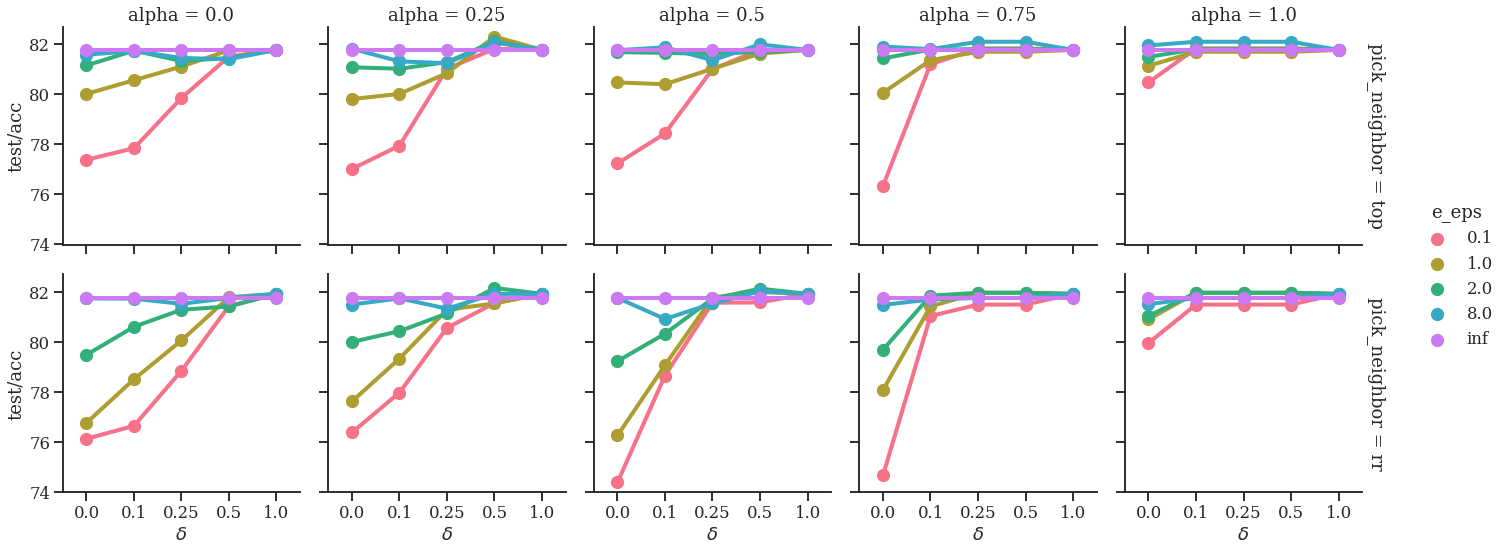

In [15]:
datasets = ['cora', 'pubmed', 'lastfm', 'facebook']
datasets = ['cora']
models = ['gcn', 'gat', 'sage']
# models = ['sage']
e_eps=[0.1, 1, 2, 8, np.inf]
alpha=[0, 0.25, 0.5, 0.75, 1]
delta=[0, 0.1, 0.25, 0.5, 1]

for model in models:
    # df_fixed_model_dataset = df_common[(df_common['model']==model)]

    for dataset in datasets:
        df_fixed_model_dataset = df_common[(df_common['dataset']==dataset) & (df_common['model']==model)]

        g = sns.catplot(kind='point', data=df_fixed_model_dataset, x='delta', y='test/acc', col='alpha', row='pick_neighbor', hue='e_eps', ci=None, sharex=True, sharey=True, palette="husl", height=4, aspect=1, margin_titles=True)
        
        # g.set_xlabels('$\delta$')

        g.savefig('./images/fix_model_dataset_top_rr/'+str(model)+'_'+str(dataset)+'.pdf', dpi=400)

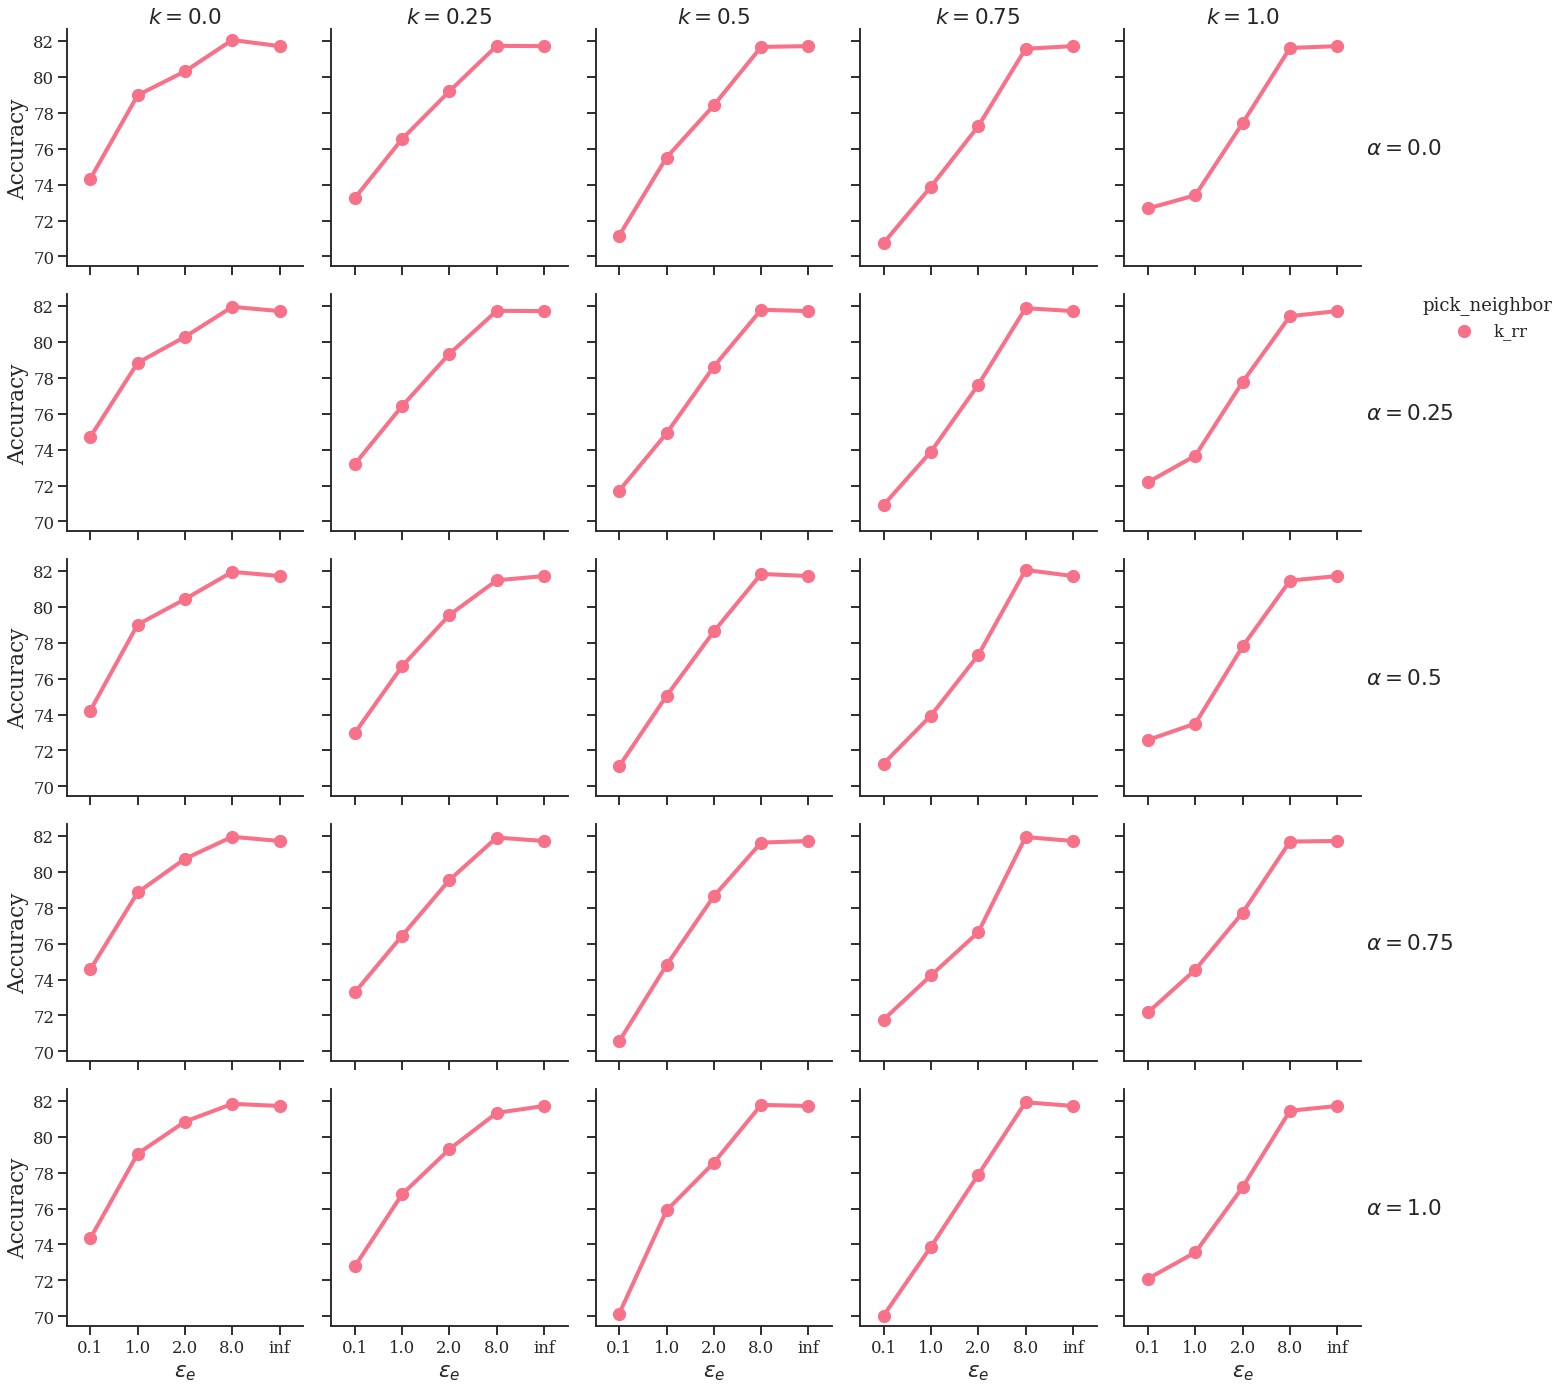

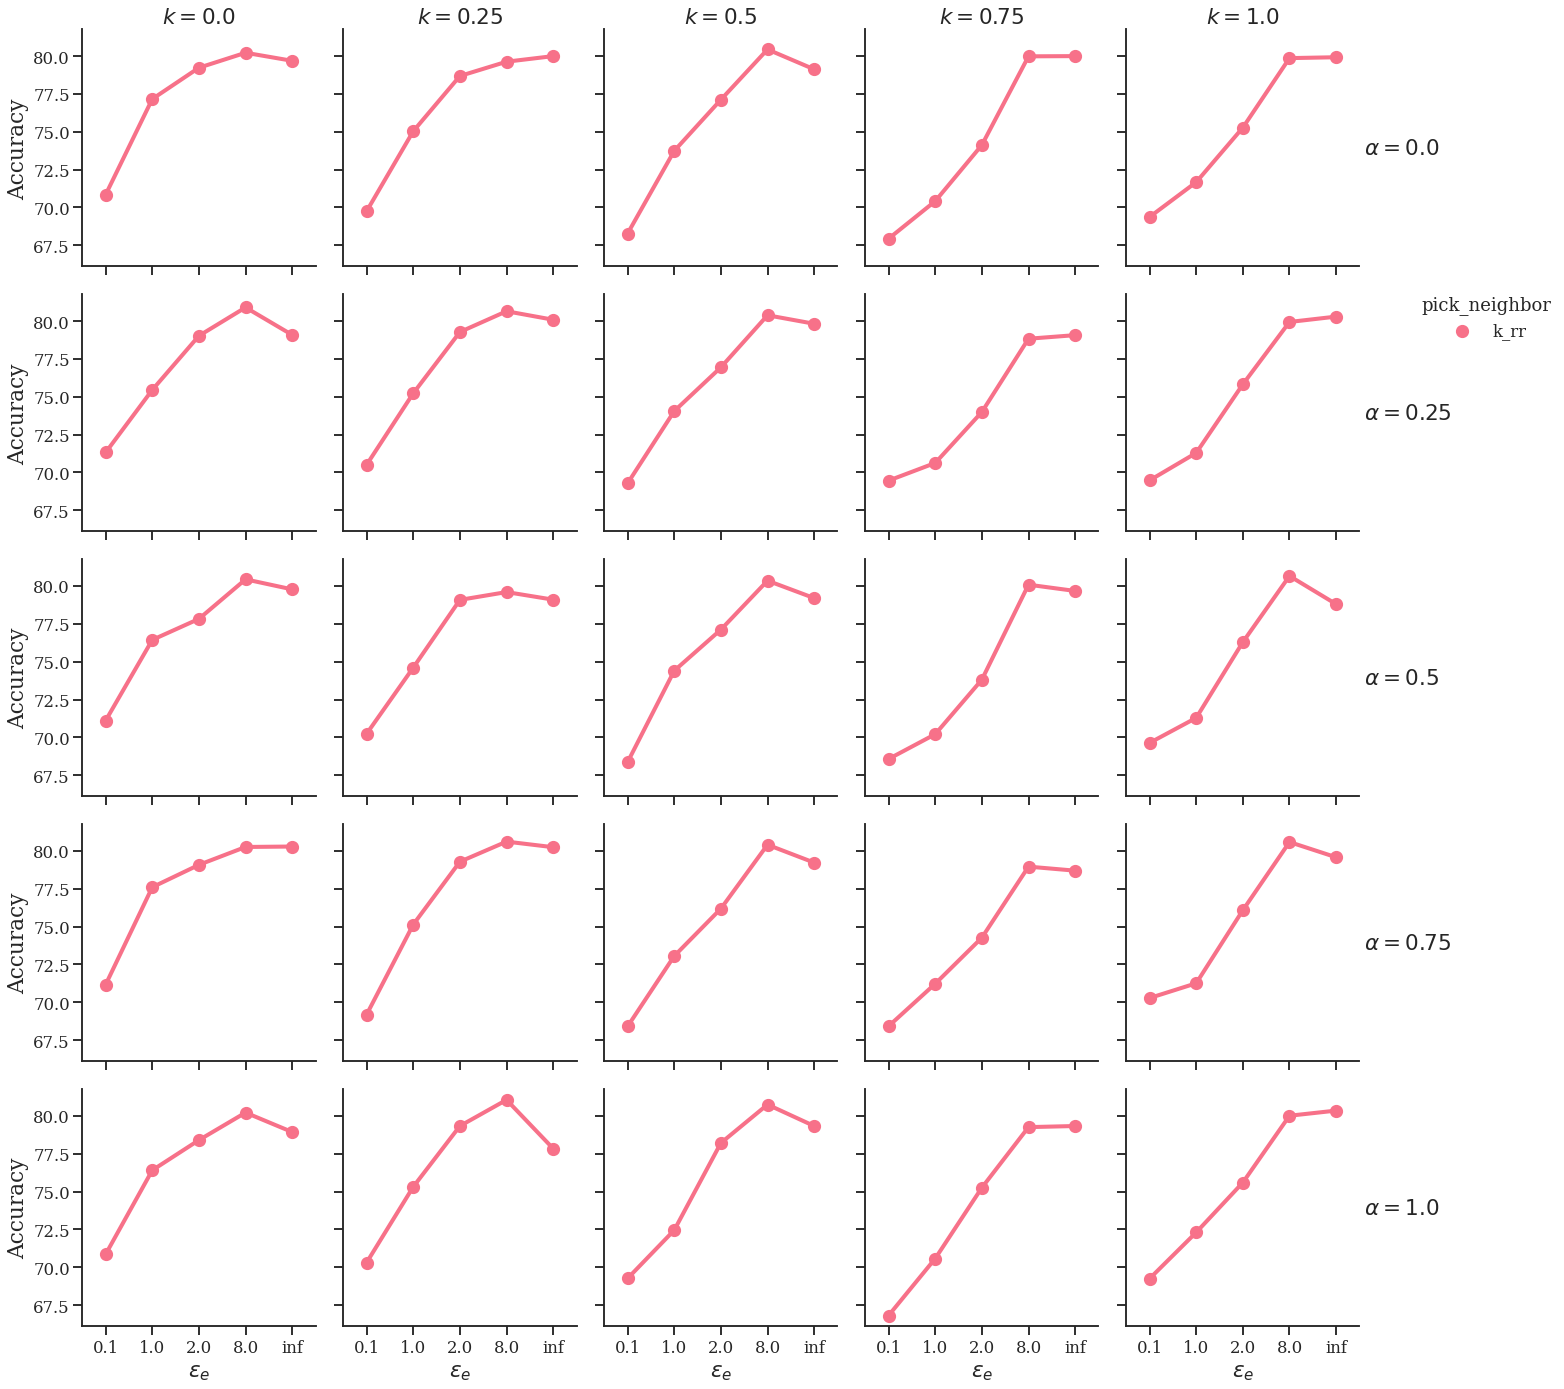

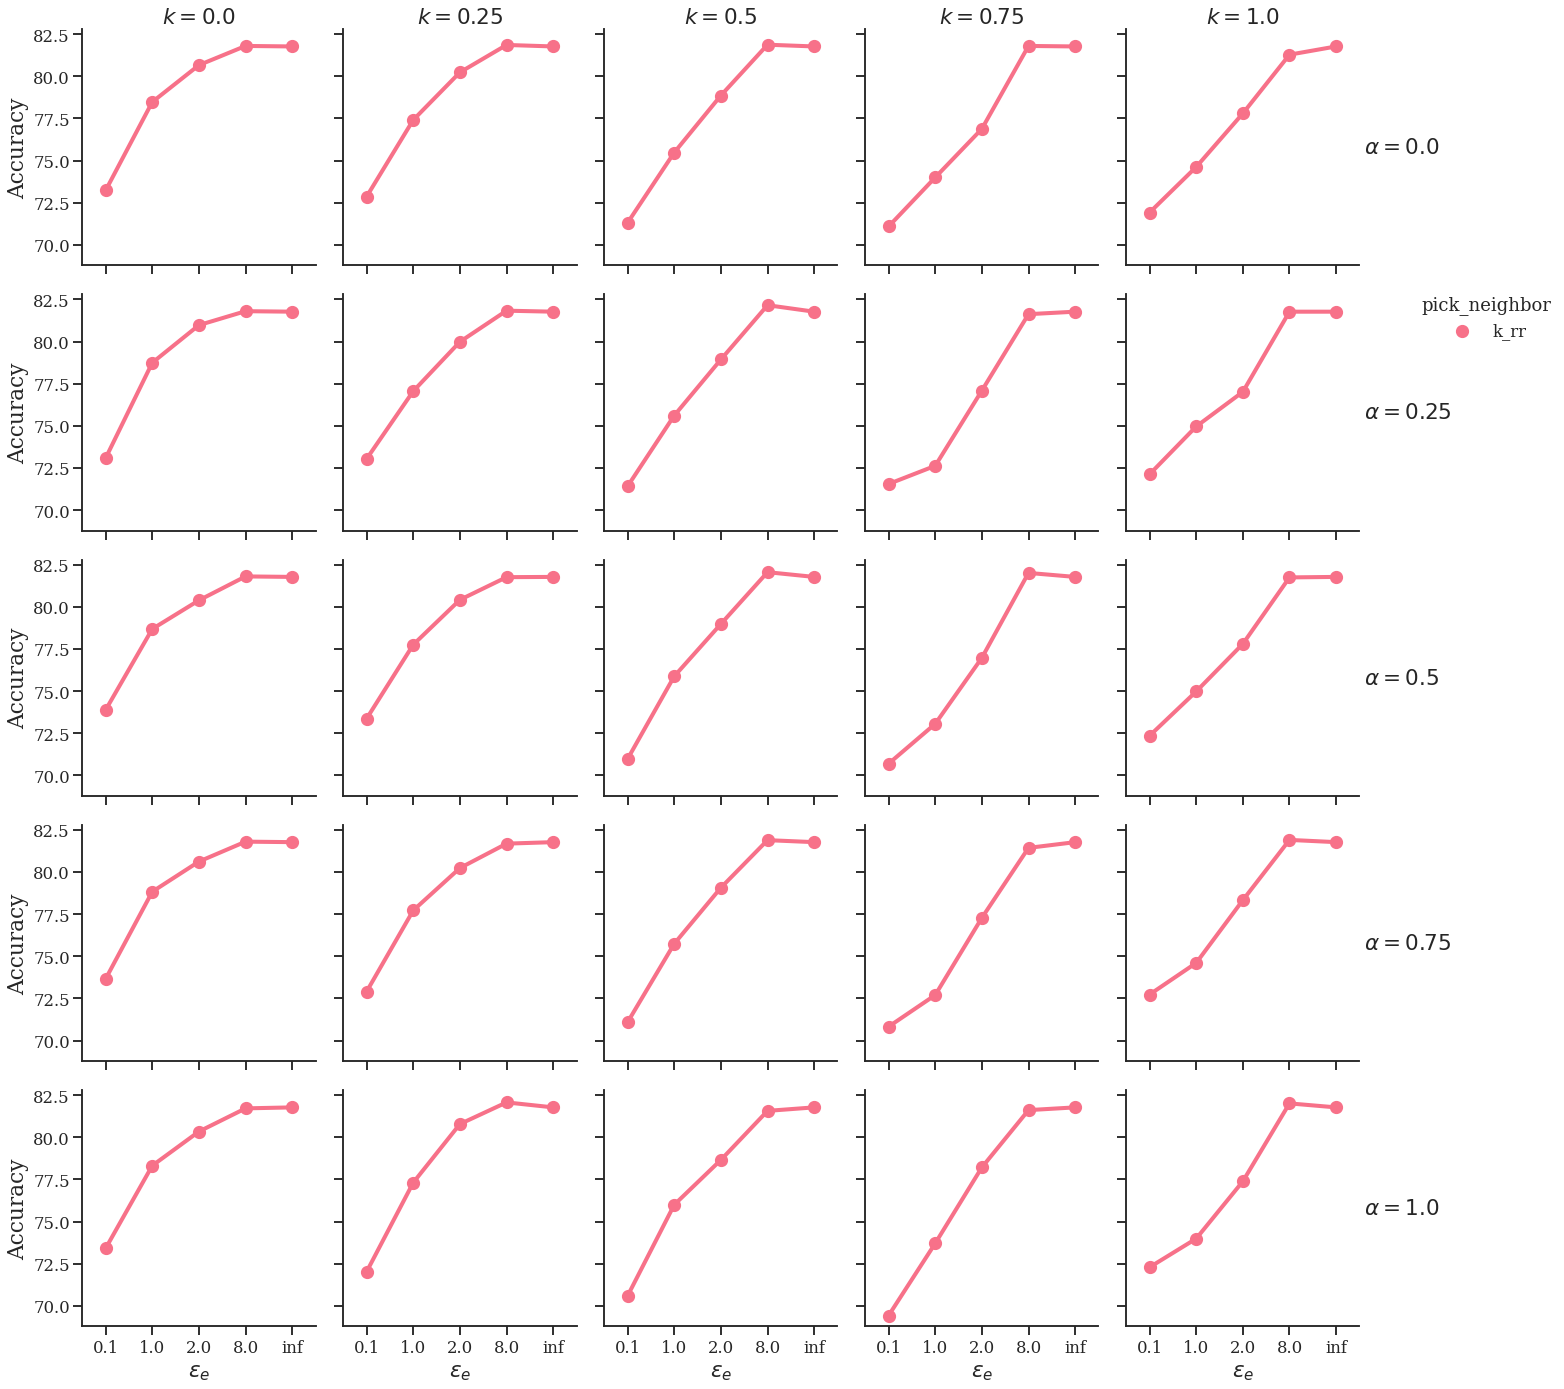

In [6]:
# Uncomment to generate results for fixed model and dataset

datasets = ['cora', 'pubmed', 'lastfm', 'facebook']
datasets = ['cora']
models = ['gcn', 'gat', 'sage']
# models = ['sage']
e_eps=[0.1, 1, 2, 8, np.inf]
alpha=[0, 0.25, 0.5, 0.75, 1]
delta=[0, 0.1, 0.25, 0.5, 1]

for model in models:
    # df_fixed_model_dataset = df_common[(df_common['model']==model)]

    for dataset in datasets:
        df_fixed_model_dataset = df_common[(df_common['dataset']==dataset) & (df_common['model']==model)]
        g = sns.catplot(kind='point', data=df_fixed_model_dataset, x='e_eps', y='test/acc', row='alpha', col='delta', hue='pick_neighbor', ci=None, sharex=True, sharey=True, palette="husl", height=4, aspect=1, margin_titles=True)

        g.fig.subplots_adjust(top=0.95) # adjust the Figure in g
        # g.fig.suptitle('Dataset: '+dataset.title()+', Model: '+model.upper())

        delta = {' 0.0'  : '$k = 0.0$',
            ' 0.25'  :   '$k = 0.25$',
            ' 0.5'   :   '$k = 0.5$',
            ' 0.75'  :   '$k = 0.75$',
            ' 1.0'   :   '$k = 1.0$'}
        
        alpha = {' 0.0'  : '$\\alpha = 0.0$',
            ' 0.25'  :   '$\\alpha = 0.25$',
            ' 0.5'   :   '$\\alpha = 0.5$',
            ' 0.75'  :   '$\\alpha = 0.75$',
            ' 1.0'   :   '$\\alpha = 1.0$'}
        
        for ax in g.axes.flat:
            # Make x and y-axis labels slightly larger
            ax.set_xlabel(ax.get_xlabel(), fontsize='large')
            ax.set_ylabel(ax.get_ylabel(), fontsize='large')

            # Make title more human-readable and larger
            if ax.get_title():
                ax.set_title(delta[ax.get_title().split('=')[1]], fontsize='large')

            # Make right ylabel more human-readable and larger
            # Only the 2nd and 4th axes have something in ax.texts
            if ax.texts:
                # This contains the right ylabel text
                txt = ax.texts[0]
                # print(txt.get_text().split('=')[1])
                ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                        alpha[txt.get_text().split('=')[1]],
                        transform=ax.transAxes,
                        va='center',
                        fontsize='large')
                # Remove the original text
                ax.texts[0].remove()

        # Setting legend
        # for txt in g.legend.get_texts():
        #     print(txt[0])
        # g.legend.set_title('$Method$')
        # g.legend.get_texts()[0].set_text('GraphPrivatizer-t')
        # g.legend.get_texts()[1].set_text('GraphPrivatizer-n')

        g.set_xlabels('$\epsilon_e$')
        g.set_ylabels('Accuracy')

        sns.move_legend(g, loc="center right", bbox_to_anchor=(1, 0.75))
        
        
        g.savefig('./images/fix_model_dataset_top_rr/'+str(model)+'_'+str(dataset)+'_top_rr.pdf', dpi=400)

KeyError: ' 0.1'

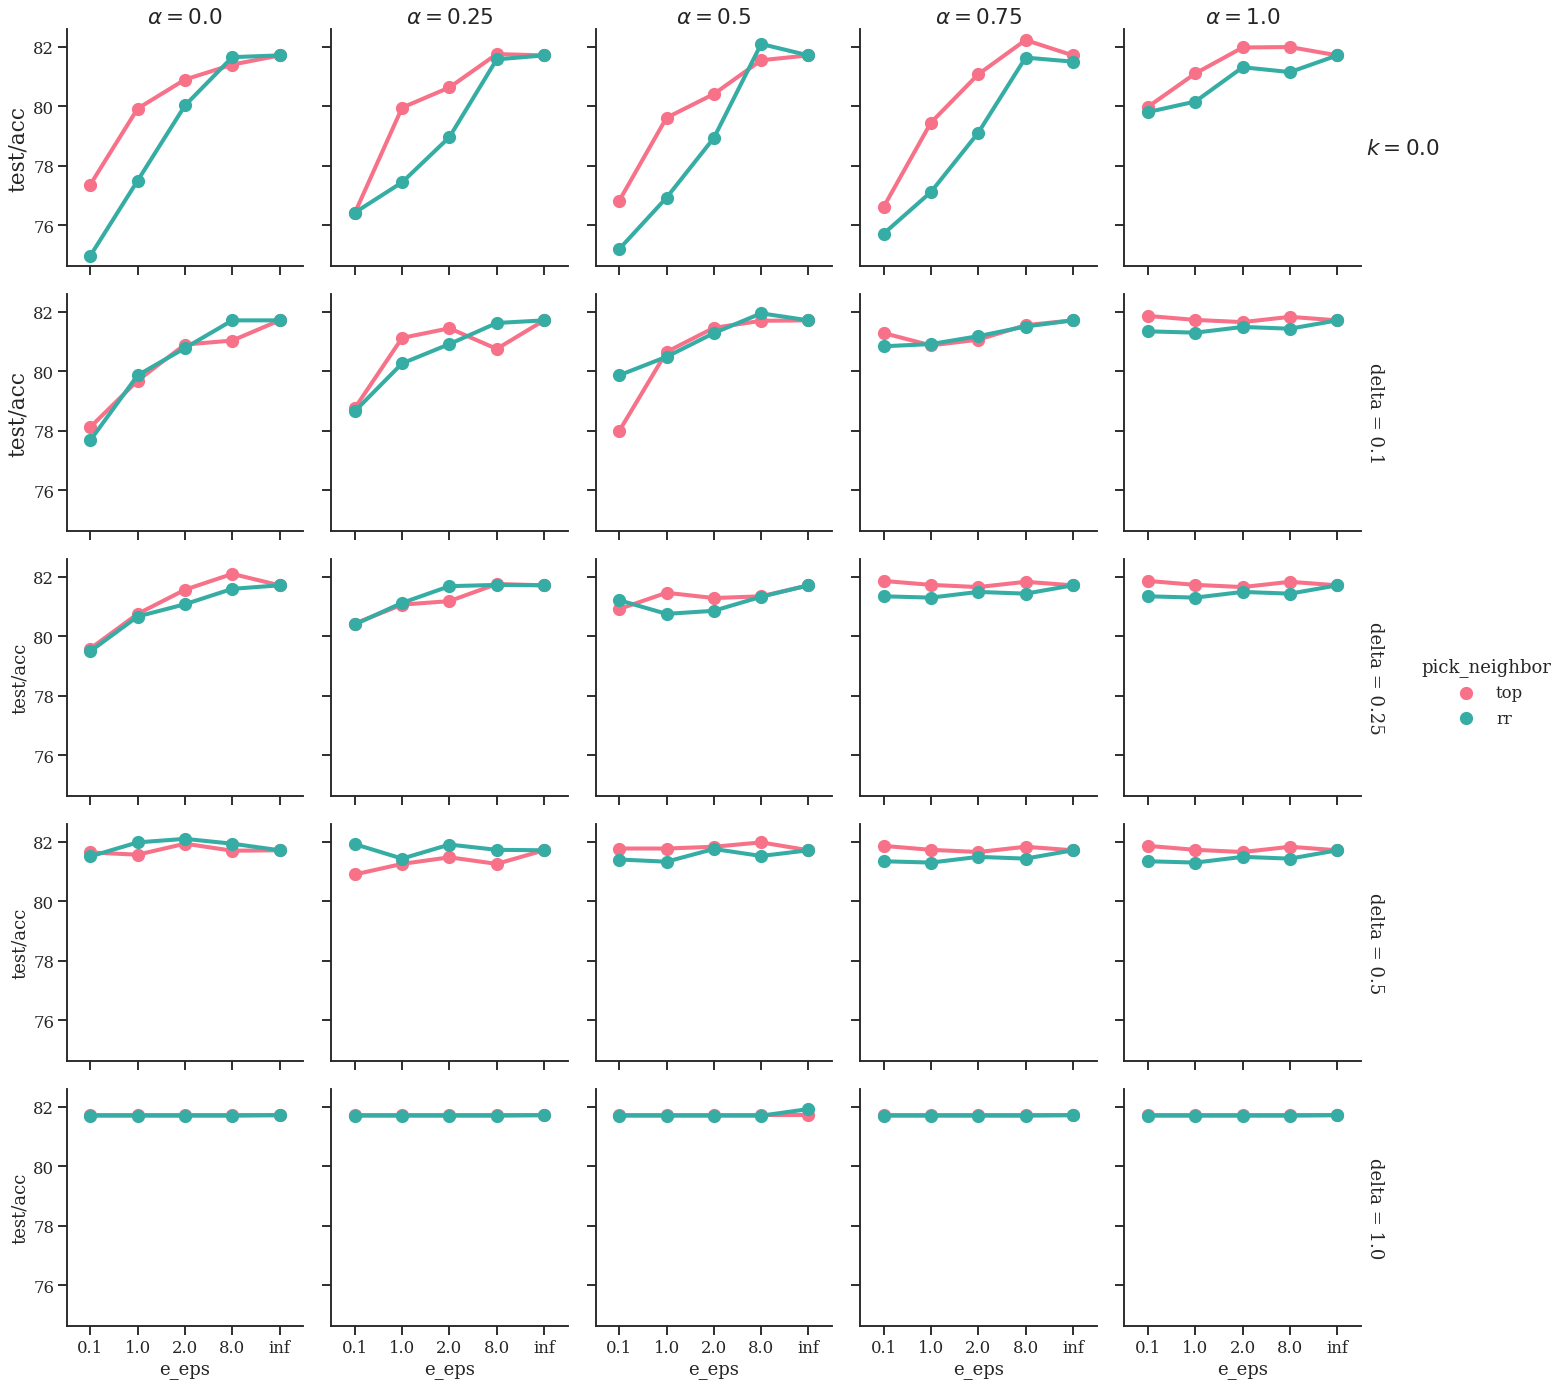

In [7]:
# Uncomment to generate results for fixed model and dataset

datasets = ['cora', 'pubmed', 'lastfm', 'facebook']
datasets = ['cora']
models = ['gcn', 'gat', 'sage']
# models = ['sage']
e_eps=[0.1, 1, 2, 8, np.inf]
alpha=[0, 0.25, 0.5, 0.75, 1]
delta=[0, 0.1, 0.25, 0.5, 1]

for model in models:
    # df_fixed_model_dataset = df_common[(df_common['model']==model)]

    for dataset in datasets:
        df_fixed_model_dataset = df_common[(df_common['dataset']==dataset) & (df_common['model']==model)]
        g = sns.catplot(kind='point', data=df_fixed_model_dataset, x='e_eps', y='test/acc', row='delta', col='alpha', hue='pick_neighbor', ci=None, sharex=True, sharey=True, palette="husl", height=4, aspect=1, margin_titles=True)

        g.fig.subplots_adjust(top=0.95) # adjust the Figure in g
        # g.fig.suptitle('Dataset: '+dataset.title()+', Model: '+model.upper())

        delta = {' 0.0'  : '$k = 0.0$',
            ' 0.25'  :   '$k = 0.25$',
            ' 0.5'   :   '$k = 0.5$',
            ' 0.75'  :   '$k = 0.75$',
            ' 1.0'   :   '$k = 1.0$'}
        
        alpha = {' 0.0'  : '$\\alpha = 0.0$',
            ' 0.25'  :   '$\\alpha = 0.25$',
            ' 0.5'   :   '$\\alpha = 0.5$',
            ' 0.75'  :   '$\\alpha = 0.75$',
            ' 1.0'   :   '$\\alpha = 1.0$'}
        
        for ax in g.axes.flat:
            # Make x and y-axis labels slightly larger
            ax.set_xlabel(ax.get_xlabel(), fontsize='large')
            ax.set_ylabel(ax.get_ylabel(), fontsize='large')

            # Make title more human-readable and larger
            if ax.get_title():
                ax.set_title(alpha[ax.get_title().split('=')[1]], fontsize='large')

            # Make right ylabel more human-readable and larger
            # Only the 2nd and 4th axes have something in ax.texts
            if ax.texts:
                # This contains the right ylabel text
                txt = ax.texts[0]
                # print(txt.get_text().split('=')[1])
                ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                        delta[txt.get_text().split('=')[1]],
                        transform=ax.transAxes,
                        va='center',
                        fontsize='large')
                # Remove the original text
                ax.texts[0].remove()

        # Setting legend
        # for txt in g.legend.get_texts():
        #     print(txt[0])
        # g.legend.set_title('$Method$')
        # g.legend.get_texts()[0].set_text('GraphPrivatizer-t')
        # g.legend.get_texts()[1].set_text('GraphPrivatizer-n')

        g.set_xlabels('$\epsilon_e$')
        g.set_ylabels('Accuracy')

        sns.move_legend(g, loc="center right", bbox_to_anchor=(1, 0.75))
        
        
        g.savefig('./images/fix_model_dataset_top_rr/'+str(model)+'_'+str(dataset)+'_top_rr.pdf', dpi=400)